# Visualizations
- Category by purchase amount (insight into high-purchase categories to prioritize product inventory)
- Category by purchase amount by location - inform what promotions to run

In [1]:
# Import libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
import scipy 

The purpose of the first visualization is to identify the high-selling categories and to understand which categories exist.

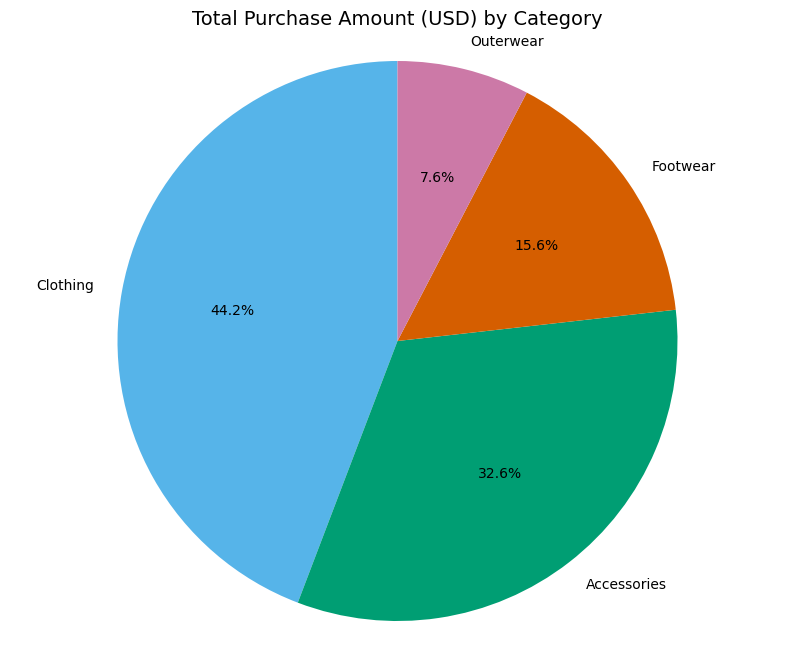

In [2]:
# Plotting category by purchase amount (insight into high-purchase categories to prioritize product inventory)

# Load the data 
df = pd.read_csv("../data/Customers3_oversampled.csv")

# Summing the purchase amounts by category
category_totals = (
    df.groupby("Category")["Purchase Amount (USD)"]
    .sum()
    .sort_values(ascending=False)
)
#print(category_totals) 
# I want to see the categories ranked in descending order based on their total sales across the entire dataset.

# Colours for accessibility 
colorblind_palette = [
    "#56B4E9",  # sky blue
    "#009E73",  # bluish green
    "#D55E00",  # vermilion
    "#CC79A7",  # reddish purple
]

# Creating a pie chart for clear distinction of most purchased category
plt.figure(figsize=(10, 8))
plt.pie(
    category_totals,
    labels = category_totals.index, # to display each category name
    colors=colorblind_palette,
    autopct = '%1.1f%%',            # to display the percentages of each category
    startangle=90                  # to display the graph in a favourable way
)

# Titles and legend 
plt.title("Total Purchase Amount (USD) by Category", fontsize = 14)
plt.axis('equal')                   # to center the visualzation 

plt.show()




In [3]:
# Find top 10 locations by total purchase amount
top_locations = (
    df.groupby("Location")["Purchase Amount (USD)"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

print(top_locations)


Location
Montana       8370
Minnesota     7634
New York      7517
Alaska        7306
Arkansas      7228
Louisiana     7209
New Mexico    7122
Maine         7106
Alabama       7100
Nebraska      7065
Name: Purchase Amount (USD), dtype: int64


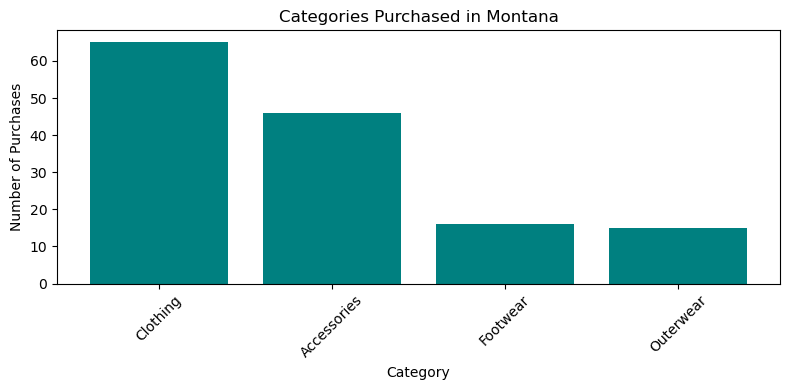

In [4]:
# Filter for Montana
montana_df = df[df["Location"] == "Montana"]

# Count how many purchases were made in each category
category_counts = montana_df["Category"].value_counts()

# Plot
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 4))
ax.bar(category_counts.index, category_counts.values, color='teal')

ax.set_title("Categories Purchased in Montana")
ax.set_xlabel("Category")
ax.set_ylabel("Number of Purchases")

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

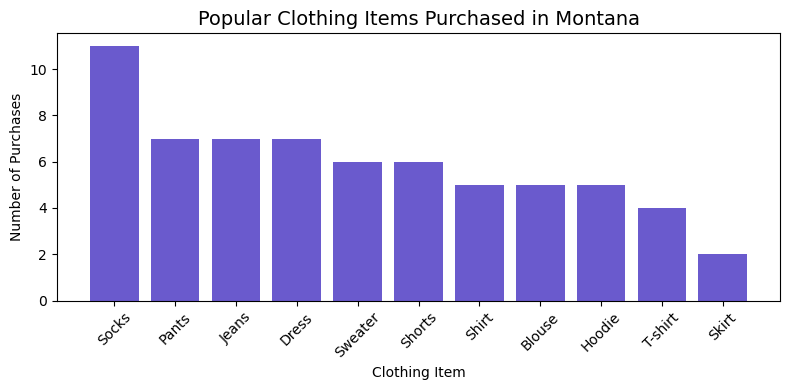

In [5]:
# Filter for Montana + Clothing category
mt_clothing = df[(df["Location"] == "Montana") & (df["Category"] == "Clothing")]

# Count each unique clothing item purchased
item_counts = mt_clothing["Item Purchased"].value_counts()

# Plot
fig, ax = plt.subplots(figsize=(8, 4))
ax.bar(item_counts.index, item_counts.values, color='slateblue')

# Customize labels and title
ax.set_title("Popular Clothing Items Purchased in Montana", fontsize=14)
ax.set_xlabel("Clothing Item")
ax.set_ylabel("Number of Purchases")

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [6]:
top10_pp_locations = df.groupby("Location")["Previous Purchases"]\
                    .sum()\
                    .sort_values(ascending=False)\
                    .head(10)

print(top10_pp_locations)



Location
Alabama       3532
Minnesota     3436
Montana       3414
Colorado      3301
Nebraska      3176
Maryland      3089
New York      3068
Alaska        3059
Kentucky      3041
California    3040
Name: Previous Purchases, dtype: int64


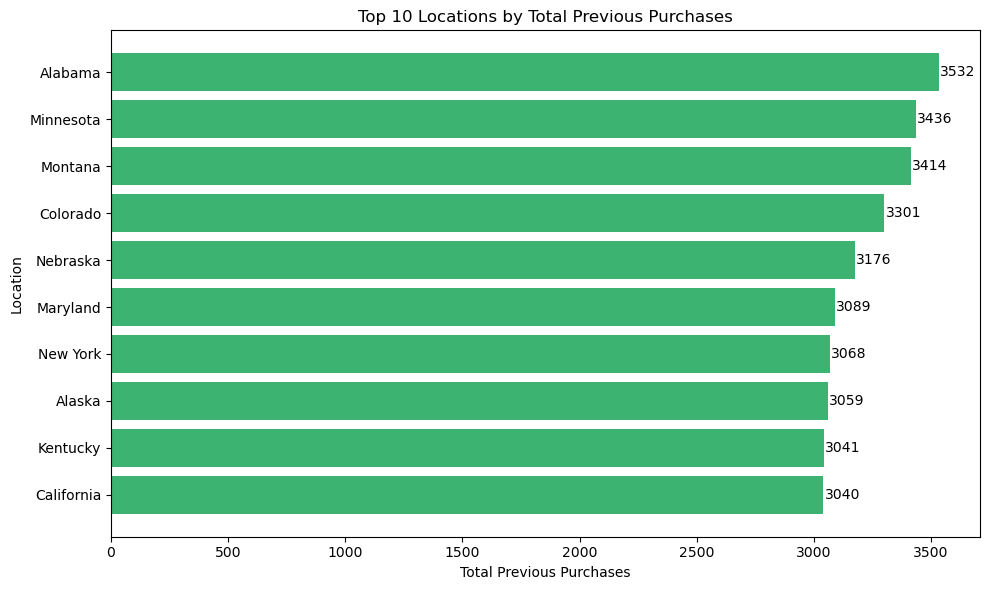

In [7]:
# Visualize the top ten locations by total previous purchases 

fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.barh(top10_pp_locations.index, top10_pp_locations.values, color='mediumseagreen')
ax.invert_yaxis()  # Highest value on top

# Add value labels to bars
for bar in bars:
    ax.text(bar.get_width() + 5, # positioning the label slightly to the right of the bar
            bar.get_y() + bar.get_height()/2, # center label vertically
            f'{int(bar.get_width())}', va='center') # sums displayed as an int 

ax.set_title("Top 10 Locations by Total Previous Purchases")
ax.set_xlabel("Total Previous Purchases")
ax.set_ylabel("Location")
plt.tight_layout()
plt.show()

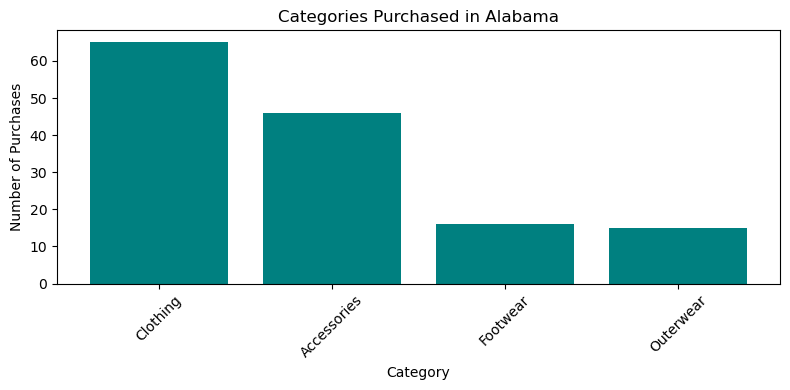

In [8]:
# Filter for Alabama
alabama_df = df[df["Location"] == "Montana"]

# Count how many purchases were made in each category
category_counts = alabama_df["Category"].value_counts()

# Plot
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 4))
ax.bar(category_counts.index, category_counts.values, color='teal')

ax.set_title("Categories Purchased in Alabama")
ax.set_xlabel("Category")
ax.set_ylabel("Number of Purchases")

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

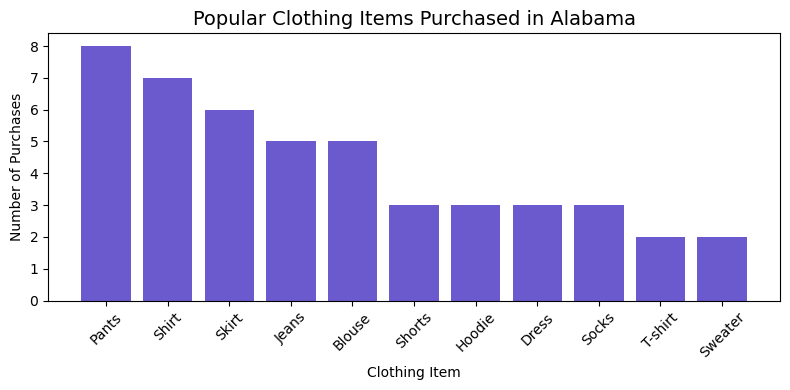

In [9]:
# Filter for Montana + Clothing category
ab_clothing = df[(df["Location"] == "Alabama") & (df["Category"] == "Clothing")]

# Count each unique clothing item purchased
item_counts = ab_clothing["Item Purchased"].value_counts()

# Plot
fig, ax = plt.subplots(figsize=(8, 4))
ax.bar(item_counts.index, item_counts.values, color='slateblue')

# Customize labels and title
ax.set_title("Popular Clothing Items Purchased in Alabama", fontsize=14)
ax.set_xlabel("Clothing Item")
ax.set_ylabel("Number of Purchases")

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Visualization created to display the state with the highest amount of previous purchases. Although Montana has the highest sales amount, there are more fequent purchases in Alabama. 

This infoms us that depending on the strategy of leadership, we should contemplate which location would make more sense. 


# Project Requirements

Python – Primary programming language used
pandas – Data cleaning and manipulation
numpy – Numeric operations and support
matplotlib – Static data visualizations
seaborn – Enhanced statistical graphics

# EDA and Data Cleaning 

- Loaded the dataset and inspected its structure using .info() and .head()
- Verified that there were no missing values in any of the 18 columns
- Identified 4 product categories: Clothing, Footwear, Outerwear, Accessories
- Used .value_counts() to inspect the most frequently purchased items
- Grouped and sorted data to find top-performing categories and locations
- Aggregated totals and filtered by state and category to prepare for visualization

# Methodology
We began by evaluating product category performance by grouping all customer purchases and summing total purchase amounts. A pie chart was used to visualize and show that Clothing is the highest revenue generating category.

Next, we identified the top ten states by total purchase value. Montana had the highest total purchase revenue. However, Alabama had the highest number of previous purchases and the highest average spend per customer, indicating a more loyal and engaged customer base.

We then analyzed purchasing behavior within both Montana and Alabama, focusing on the Clothing category, and identified the most frequently purchased items. This can help guide targeted promotions, inform inventory planning, and influence store setup.

# Results
We found that while Montana generated the most revenue overall, Alabama customers made more repeat purchases and spent more on average. Clothing significantly outperformed Accessories, Footwear, and Outerwear in total sales. In Montana, the top sellers were socks, pants, and jeans. In Alabama, pants, shirts, skirts, and jeans were the most popular.

# Final Conclusion
Montana led in total revenue, while Alabama stood out for customer loyalty and higher average spend per purchase. These highlight multiple factors to consider when evaluating potential store locations. Across both states, high-performing clothing items included pants and jeans, with additional demand in Alabama for shirts and skirts, and in Montana for socks. These patterns can inform future promotion strategies and inventory to stock.




In [10]:
avg_price_per_item = df.groupby("Item Purchased")["Purchase Amount (USD)"].mean().sort_values(ascending=False)

print(avg_price_per_item)


Item Purchased
Boots         62.795699
Gloves        62.155779
T-shirt       61.838710
Scarf         61.115741
Shirt         61.084821
Pants         61.080508
Dress         61.039648
Shoes         60.715686
Skirt         60.689498
Jewelry       60.317972
Sneakers      60.113402
Jeans         60.095890
Belt          59.927350
Backpack      59.478261
Hat           59.043860
Blouse        58.453061
Shorts        57.995000
Handbag       57.787736
Sweater       57.582938
Sunglasses    57.352423
Coat          57.144279
Hoodie        57.033654
Sandals       56.802575
Socks         56.759494
Jacket        54.386957
Name: Purchase Amount (USD), dtype: float64
